In [5]:
import json
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime, timedelta
from matplotlib.dates import DateFormatter
import adjustText as adj
import os
import pandas as pd

In [13]:
# Open the JSON file
with open('DataCollection/CoqTheorems.json') as f:
    # Load the JSON data into a Python dictionary
    theorem_data = json.load(f)

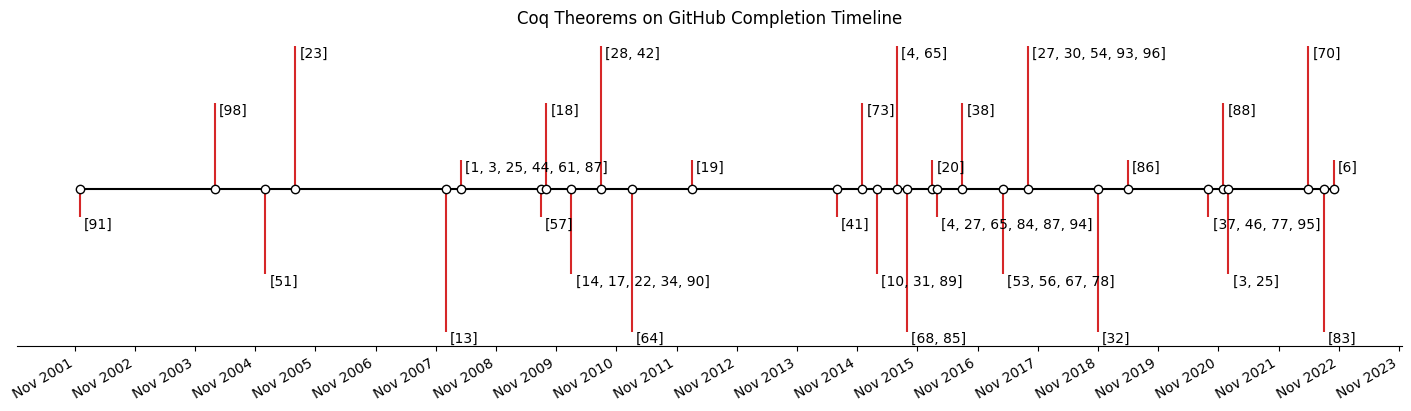

In [14]:
#################################
#### latest activity timeline ###
#################################
commits = []
last_commit_date =  []
names = []
for element in theorem_data:
    if isinstance(element, dict):
        for sources in element['sources']:
            if 'commits' in sources:
                commit = sources['commits']
                count = len(commit)
                if len(commit) > 0:
                    # Only append to plot if it has commits
                    commits.append(count)
                    names.append(element['theorem_number'])
                    last_commit_date.append(commit[len(commit) - 1]['date'])
    else:
        print("Each element in the JSON file must be a dictionary.")

# Convert date strings (e.g. 2014-10-18) to datetime
dates = [datetime.strptime(d, "%Y-%m-%dT%H:%M:%S%z") for d in last_commit_date]

# Create a dataframe
df = pd.DataFrame({'Commits': commits, 'Dates': dates, 'Names': names})
# Localize time zones
df['Dates'] = pd.to_datetime(df['Dates'], utc=True)
df['Dates'] = df['Dates'].dt.tz_convert('US/Eastern')
# Bin dataframe by month
bins = pd.date_range(start=df['Dates'].min() - timedelta(days=1) , end=df['Dates'].max() + timedelta(days=31) , freq='M')
df['bins'] = pd.cut(x=df['Dates'], bins=bins, labels = [d.strftime('%b-%Y') for d in bins][:-1], include_lowest=True)
# Aggregate bins
agg = df.groupby('bins')['Names'].aggregate(list)

# Choose some nice levels
map = np.tile([-5, 5, -3, 3, -1, 1], int(np.ceil(len(agg)/6)))[:len(agg)]
levels = []
present_bins = []
for idx in range(len(agg)):
    if (len(agg[idx])) > 0:
        levels.append(map[-1])
        map = map[:-1]
        present_bins.append(bins[idx])
    else:
        levels.append(0)
levels.append(0)

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(14, 4), layout="constrained")
ax.set(title="Coq Theorems on GitHub Completion Timeline")

ax.vlines(bins, ymin=0, ymax=levels, color="tab:red")  # The vertical stems.
ax.plot(present_bins, np.zeros_like(present_bins), "-o",
        color="k", markerfacecolor="w")  # Baseline and markers on it.

# annotate lines
for d, l, r in zip(bins, levels, agg):
    if (len(r) > 0):
        ax.annotate(r, xy=(d, l),
                    xytext=(3, 0), textcoords="offset points",
                    rotation=0,
                    horizontalalignment="left",
                    verticalalignment="top")

# format x-axis with 4-month intervals
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=12))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")


# remove y-axis and spines
ax.yaxis.set_visible(False)
ax.spines[["left", "top", "right"]].set_visible(False)

In [7]:
# Get the list of theorems that have been implemented multiple times
for element in theorem_data:
    if isinstance(element, dict):
        if (len(element['sources']) > 1):
                print(element['theorem_number'])
    else:
        print("Each element in the JSON file must be a dictionary.")

3
4
11
15
20
22
25
26
27
44
51
52
65
74
86
87


Text(0.5, 1.0, '\nTheorem 41 excluded as outlier')

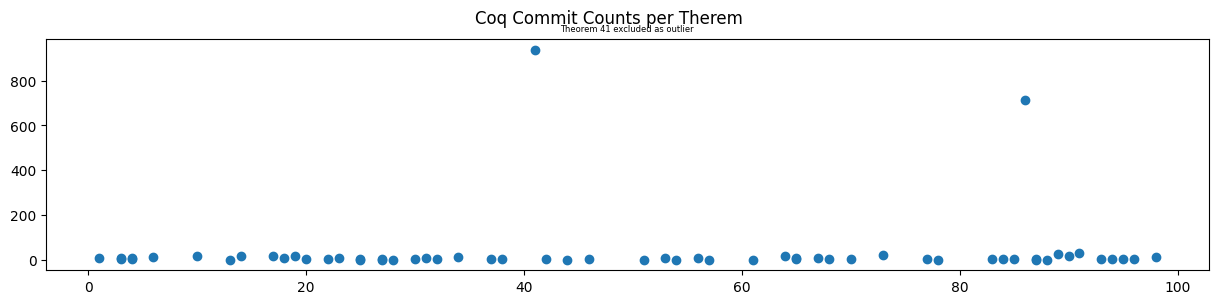

In [15]:
#################################
#### Commit Counts per Therem ###
#################################

# cache commits
commits_copy = commits
# # Plot a histogram of the lengths using matplotlib
plt.figure(figsize=(15, 3))
plt.scatter(names, commits)
plt.suptitle('Coq Commit Counts per Therem\n')
plt.title('\nTheorem 41 excluded as outlier', fontsize = 6)
# plt.show()

[Text(0.5, 1.0, 'Coq number of commits per year')]

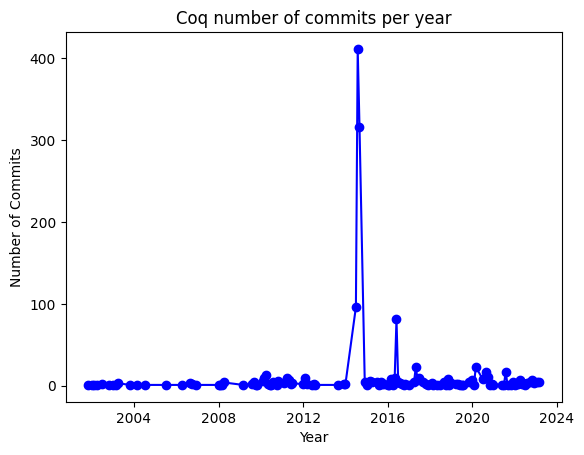

In [16]:
#################################
#### Number of Commits over time ###
#################################
dates = []
# Loop through each element in the list
for element in theorem_data:
    # Check if the element is a dictionary
    if isinstance(element, dict):
        # Get the length of the dictionary (i.e., the number of key-value pairs)
        sources = element['sources'][0]
        if 'commits' in sources:
            commits = sources['commits']
            if len(commits) > 0:
                for commit in commits:
                    dates.append(datetime.strptime(commit['date'], "%Y-%m-%dT%H:%M:%S%z"))
    else:
        # If it's not a dictionary, print an error message
        print("Each element in the JSON file must be a dictionary.")
# Count the number of commits per month of each year
counts = {}
for date in dates:
    year_month = date.strftime("%Y-%m")
    if year_month in counts:
        counts[year_month] += 1
    else:
        counts[year_month] = 1


# Sort the counts by year and month
counts = dict(sorted(counts.items()))
# Extract the years and months from the keys and values
x_values = [datetime.strptime(year_month, "%Y-%m") for year_month in counts.keys()]
y_values = list(counts.values())

# Create a timeline plot with the counts
fig, ax = plt.subplots()
ax.plot_date(x_values, y_values, fmt="bo-", xdate=True, ydate=False)

# Set the x-axis tick labels to show the year and month
date_formatter = DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_formatter)
ax.set_xlabel("Year")
ax.set_ylabel("Number of Commits")
ax.set(title= "Coq number of commits per year")
# plt.show()

incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incremented
incr

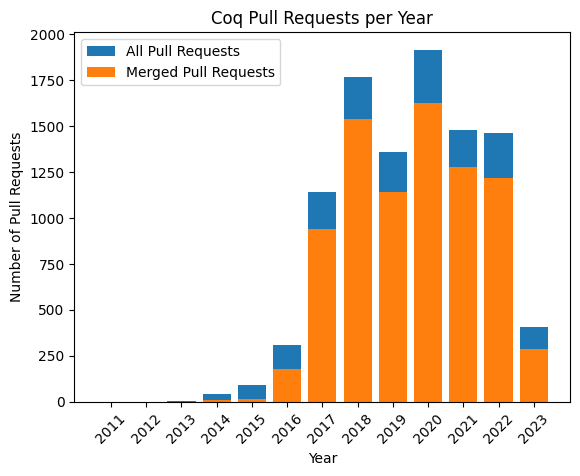

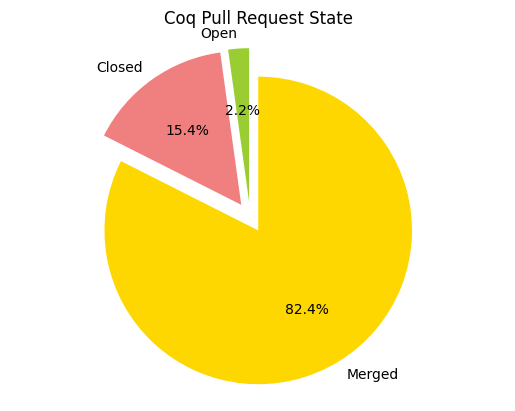

In [17]:
#################################
#### all pull requests and merged pull requests###
#################################

# Initialize an empty list to store the JSON data
coq_pr_data = []

# Loop through each file in the folder
for filename in os.listdir('DataCollection/coq-prs'):
    # Check if the file is a JSON file
    if filename.endswith(".json"):
        # Read the JSON data from the file
        with open(os.path.join('DataCollection/coq-prs', filename), "r") as f:
            coq_pr = json.load(f)
        # Append the JSON data to the list
        coq_pr_data.extend(coq_pr)

pull_dates= []
merge_dates= []
open_count = 0
closed_count = 0
merged_count =0

for element in coq_pr_data:
    pull_dates.append(datetime.strptime(element['open_date'], "%Y-%m-%dT%H:%M:%S%z"))
    if element['state'] == 'open':
        open_count += 1
    elif element['state'] == 'merged':
        merged_count += 1
        merge_dates.append(datetime.strptime(element['open_date'], "%Y-%m-%dT%H:%M:%S%z"))
    elif element['state'] == 'closed':
        x = element['discussion']
        for i in x :
            if i['author'] == 'bors[bot]' :
                msg = i['comment']
                txt = 'Pull request successfully merged into master.'
                if os.path.commonprefix([msg,txt]) == txt :
                    merged_count += 1
                    merge_dates.append(datetime.strptime(element['open_date'], "%Y-%m-%dT%H:%M:%S%z"))
                    continue
        closed_count += 1

# Count the number of pull requests and merged pull requests per year
pull_counts = {}
merge_counts = {}
for date in pull_dates:
    year = date.strftime("%Y")
    if year in pull_counts:
        pull_counts[year] += 1
        print('incremented')
    else:
        pull_counts[year] = 1
for date in merge_dates:
    year = date.strftime("%Y")
    if year in merge_counts:
        print('incremented')
        merge_counts[year] += 1
    else:
        merge_counts[year] = 1

# Sort the counts by year
pull_counts = dict(sorted(pull_counts.items()))
merge_counts = dict(sorted(merge_counts.items()))
# Extract the years from the keys and values
y_pull_values = list(pull_counts.values())
y_merge_values = []
for year in pull_counts.keys():
    if year in merge_counts:
        y_merge_values.append(merge_counts[year])
    else:
        y_merge_values.append(0)

# Create a line chart with the counts
fig, ax = plt.subplots()
#ax.plot_date(x_values, y_pull_values, fmt="bo-", xdate=True, ydate=False, label="All Pull Requests")
#ax.plot_date(x_values, y_merge_values, fmt="bo-", xdate=True, ydate=False, label="All Pull Requests")
ax.bar(pull_counts.keys(), y_pull_values, label="All Pull Requests")
ax.bar(pull_counts.keys(), y_merge_values, label="Merged Pull Requests")
ax.set_xlabel("Year")
ax.set_ylabel("Number of Pull Requests")
ax.set(title= "Coq Pull Requests per Year")
ax.legend()
plt.xticks(rotation=45)
plt.show()

# Create a pie chart with the counts
labels = ["Open", "Closed", "Merged"]
sizes = [open_count, closed_count, merged_count]
colors = ["yellowgreen", "lightcoral", "gold"]
explode = (0.1, 0.1, 0.1)  # explode the Open slice
fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", startangle=90)
ax.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title("Coq Pull Request State")
plt.show()

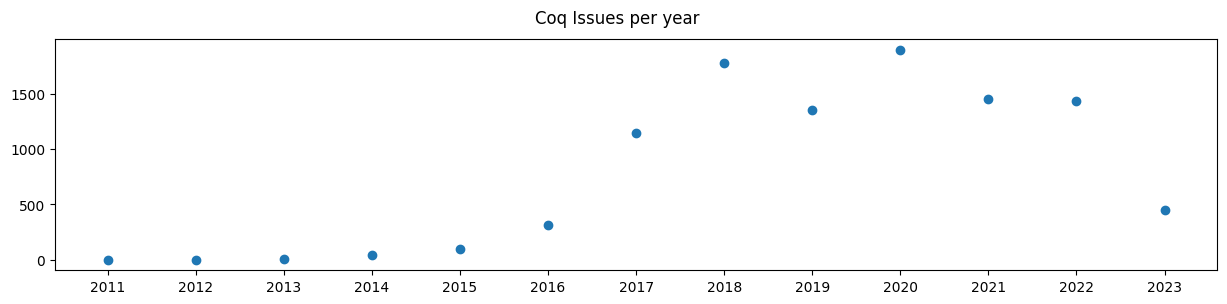

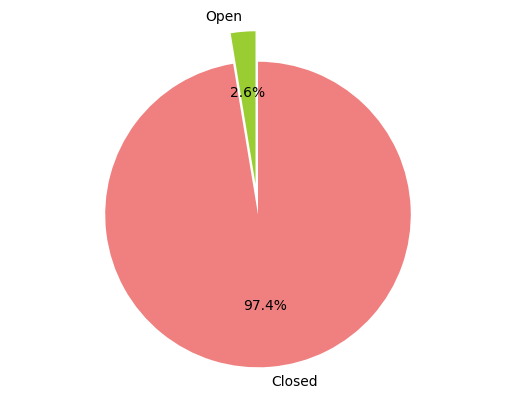

In [11]:
#################################
#### Issues###
#################################

# Initialize an empty list to store the JSON data
coq_issue_data = []

# Loop through each file in the folder
for filename in os.listdir('DataCollection/coq-issues'):
    # Check if the file is a JSON file
    if filename.endswith(".json"):
        filepath = os.path.join('DataCollection/coq-issues', filename)
        try:
            with open(filepath) as f:
                data = json.load(f)
                coq_issue_data.extend(data)
        except json.JSONDecodeError:
            pass

issues_dates= []
open_issue_count = 0
closed_issue_count = 0

for element in coq_issue_data:
    issues_dates.append(datetime.strptime(element['open_date'], "%Y-%m-%dT%H:%M:%S%z"))
    if element['state'] == 'open':
        open_issue_count += 1
    elif element['state'] == 'closed':
        closed_issue_count += 1

# Count the number of pull requests and merged pull requests per year
issue_counts = {}
for date in issues_dates:
    year = date.strftime("%Y")
    if year in issue_counts:
        issue_counts[year] = issue_counts.get(year, 0) + 1
    else:
        issue_counts[year] = 1

# Sort the counts by year
issue_counts = dict(sorted(issue_counts.items()))
plt.figure(figsize=(15, 3))
plt.scatter(issue_counts.keys(), issue_counts.values())
plt.suptitle("Coq Issues per year")
# plt.show()

# Create a pie chart with the counts
labels = ["Open", "Closed"]
sizes = [open_issue_count, closed_issue_count]
colors = ["yellowgreen", "lightcoral"]
explode = (0.1, 0.1)  # explode the Open slice
fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", startangle=90)
ax.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
# ax.set_title("Coq Issues State")
plt.show()

In [20]:
# Find the number of unique contributors 
# Unique contributors are anyone who has committed or participated in and issue or pull request

# Coq Lang Issues
with open('DataCollection/coq-issues/coq_coq_Issues.json') as f:
    data = json.load(f)
df = pd.DataFrame(data)
df['open_date'] = pd.to_datetime(df['open_date'])
df['year'] = df['open_date'].dt.year
issue_comments_list_lang = []
issues_list_lang = []
for i, row in df.iterrows():
    for comment in row['discussion']:
        comment_year = pd.to_datetime(comment['date']).year
        issue_comments_list_lang.append({'author': comment['author'], 'year': comment_year})
    issues_list_lang.append({'author': row['author'], 'year': row['year']})
issue_comment_authors_lang = pd.DataFrame(issue_comments_list_lang)
issue_authors_lang = pd.DataFrame(issues_list_lang)

# Coq Library Issues
data = []
for filename in os.listdir('DataCollection/coq-issues'):
    # Check if the file is a JSON file
    if filename.endswith(".json") and filename != 'coq_coq_Issues.json':
        filepath = os.path.join('DataCollection/coq-issues', filename)
        try:
            with open(filepath) as f:
                data.extend(json.load(f))
        except json.JSONDecodeError:
            pass
df = pd.DataFrame(data)
df['open_date'] = pd.to_datetime(df['open_date'])
df['year'] = df['open_date'].dt.year
issue_comments_list_lib = []
issues_list_lib = []
for i, row in df.iterrows():
    for comment in row['discussion']:
        comment_year = pd.to_datetime(comment['date']).year
        issue_comments_list_lib.append({'author': comment['author'], 'year': comment_year})
    issues_list_lib.append({'author': row['author'], 'year': row['year']})
issue_comment_authors_lib = pd.DataFrame(issue_comments_list_lib)
issue_authors_lib = pd.DataFrame(issues_list_lib)

# Coq Lang PRs
with open('DataCollection/coq-prs/coq_coq_PullRequests.json') as f:
    data = json.load(f)
df = pd.DataFrame(data)
df['open_date'] = pd.to_datetime(df['open_date'])
df['year'] = df['open_date'].dt.year
pr_comments_list_lang = []
prs_list_lang = []
for i, row in df.iterrows():
    for comment in row['discussion']:
        comment_year = pd.to_datetime(comment['date']).year
        pr_comments_list_lang.append({'author': comment['author'], 'year': comment_year})
    prs_list_lang.append({'author': row['author'], 'year': row['year']})
pr_comment_authors_lang = pd.DataFrame(pr_comments_list_lang)
pr_authors_lang = pd.DataFrame(prs_list_lang)

# Coq Library PRs
data = []
for filename in os.listdir('DataCollection/coq-prs'):
    # Check if the file is a JSON file
    if filename.endswith(".json") and filename != 'coq_coq_PullRequests.json':
        filepath = os.path.join('DataCollection/coq-prs', filename)
        try:
            with open(filepath) as f:
                data.extend(json.load(f))
        except json.JSONDecodeError:
            pass
df = pd.DataFrame(data)
df['open_date'] = pd.to_datetime(df['open_date'])
df['year'] = df['open_date'].dt.year
pr_comments_list_lib = []
prs_list_lib = []
for i, row in df.iterrows():
    for comment in row['discussion']:
        comment_year = pd.to_datetime(comment['date']).year
        pr_comments_list_lib.append({'author': comment['author'], 'year': comment_year})
    prs_list_lib.append({'author': row['author'], 'year': row['year']})
pr_comment_authors_lib = pd.DataFrame(pr_comments_list_lib)
pr_authors_lib = pd.DataFrame(prs_list_lib)

# Coq lang commits
with open('DataCollection/coq-commits/Coq_coq_coq_Commits.json') as f:
    coq_commits = json.load(f)
df = pd.DataFrame(coq_commits)
df['date'] = pd.to_datetime(df['date'], utc=True)
df['year'] = df['date'].dt.year
commits_list_lang = []
for i, row in df.iterrows():
    commits_list_lang.append({'author': row['author'], 'year': row['year']})
commit_authors_lang = pd.DataFrame(commits_list_lang)

# Coq library commits
data = []
for filename in os.listdir('DataCollection/coq-commits'):
    # Check if the file is a JSON file
    if filename.endswith(".json") and filename != 'Coq_coq_coq_Commits.json':
        filepath = os.path.join('DataCollection/coq-commits', filename)
        try:
            with open(filepath) as f:
                data.extend(json.load(f))
        except json.JSONDecodeError:
            pass
df = pd.DataFrame(data)
df['date'] = pd.to_datetime(df['date'], utc=True)
df['year'] = df['date'].dt.year
commits_list_lib = []
for i, row in df.iterrows():
    commits_list_lib.append({'author': row['author'], 'year': row['year']})
commit_authors_lib = pd.DataFrame(commits_list_lib)

# Create arrays of unique authors by year
icua_lean_lang = issue_comment_authors_lang.groupby('year')['author'].nunique()
iua_lean_lang = issue_authors_lang.groupby('year')['author'].nunique()
prcua_lean_lang = pr_comment_authors_lang.groupby('year')['author'].nunique()
prua_lean_lang = pr_authors_lang.groupby('year')['author'].nunique()
cua_lean_lang = commit_authors_lang.groupby('year')['author'].nunique()
icua_lean_lib = issue_comment_authors_lib.groupby('year')['author'].nunique()
iua_lean_lib = issue_authors_lib.groupby('year')['author'].nunique()
prcua_lean_lib = pr_comment_authors_lib.groupby('year')['author'].nunique()
prua_lean_lib = pr_authors_lib.groupby('year')['author'].nunique()
cua_lean_lib = commit_authors_lib.groupby('year')['author'].nunique()   

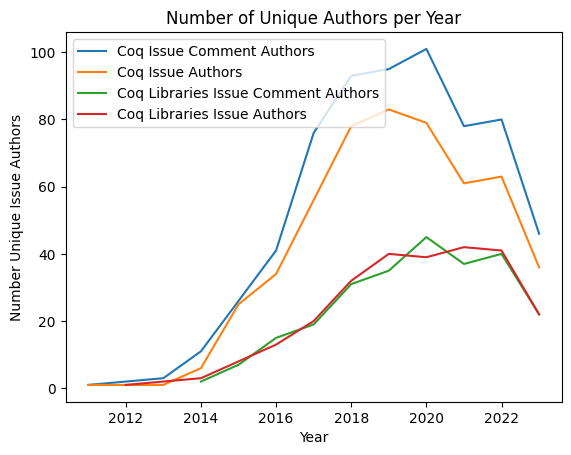

In [21]:
icua_lean_lang.plot(kind='line', label='Coq Issue Comment Authors')
iua_lean_lang.plot(kind='line', label='Coq Issue Authors')
icua_lean_lib.plot(kind='line', label='Coq Libraries Issue Comment Authors')
iua_lean_lib.plot(kind='line', label='Coq Libraries Issue Authors')
plt.xlabel('Year')
plt.ylabel('Number Unique Issue Authors')
plt.title('Number of Unique Authors per Year')
plt.legend()
plt.show()

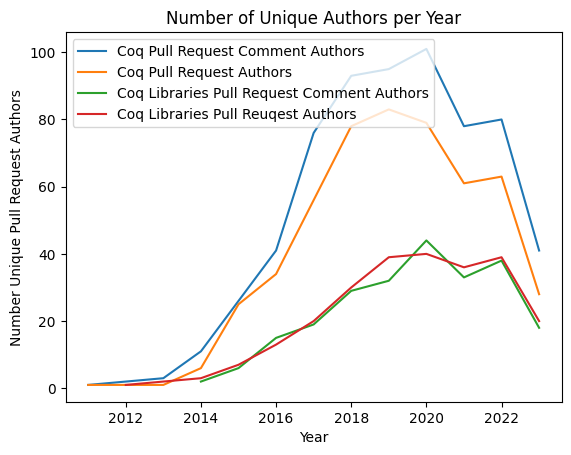

In [22]:
prcua_lean_lang.plot(kind='line', label='Coq Pull Request Comment Authors')
prua_lean_lang.plot(kind='line', label='Coq Pull Request Authors')
prcua_lean_lib.plot(kind='line', label='Coq Libraries Pull Request Comment Authors')
prua_lean_lib.plot(kind='line', label='Coq Libraries Pull Reuqest Authors')
plt.xlabel('Year')
plt.ylabel('Number Unique Pull Request Authors')
plt.title('Number of Unique Authors per Year')
plt.legend()
plt.show()

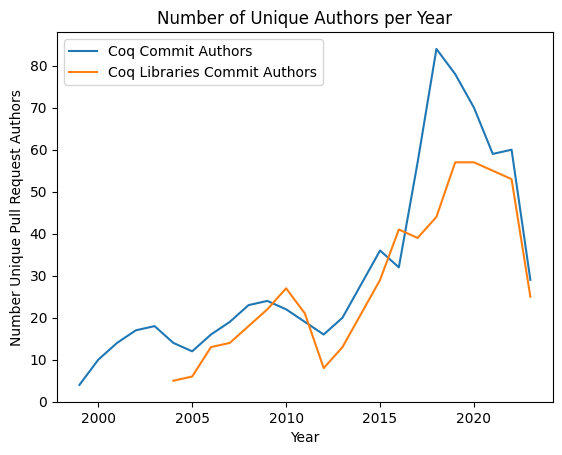

In [23]:
cua_lean_lang.plot(kind='line', label='Coq Commit Authors')
cua_lean_lib.plot(kind='line', label='Coq Libraries Commit Authors')
plt.xlabel('Year')
plt.ylabel('Number Unique Pull Request Authors')
plt.title('Number of Unique Authors per Year')
plt.legend()
plt.show()

In [30]:
# Alternative Implementation of the Above
# Find the number of unique contributors 
# Unique contributors are anyone who has committed or participated in an issue or pull request

# Coq Lang Issues + Pull Requests
with open('DataCollection/coq-issues/coq_coq_Issues.json') as f:
    data = json.load(f)
with open('DataCollection/coq-prs/coq_coq_PullRequests.json') as f_lean_pr:
    data.extend(json.load(f_lean_pr))
df = pd.DataFrame(data)
df['open_date'] = pd.to_datetime(df['open_date'])
df['year'] = df['open_date'].dt.year
ispr_comments_lang = []
ispr_list_lang = []
for i, row in df.iterrows():
    for comment in row['discussion']:
        comment_year = pd.to_datetime(comment['date']).year
        ispr_comments_lang.append({'author': comment['author'], 'year': comment_year})
    ispr_list_lang.append({'author': row['author'], 'year': row['year']})
ispr_comment_authors_lang = pd.DataFrame(ispr_comments_lang)
ispr_authors_lang = pd.DataFrame(ispr_list_lang)

# Lean Mathlib Issues + Pull Requests
data = []
for filename in os.listdir('DataCollection/coq-issues'):
    # Check if the file is a JSON file
    if filename.endswith(".json") and filename != 'coq_coq_Issues.json':
        filepath = os.path.join('DataCollection/coq-issues', filename)
        try:
            with open(filepath) as f:
                data.extend(json.load(f))
        except json.JSONDecodeError:
            pass
for filename in os.listdir('DataCollection/coq-prs'):
    # Check if the file is a JSON file
    if filename.endswith(".json") and filename != 'coq_coq_PullRequests.json':
        filepath = os.path.join('DataCollection/coq-prs', filename)
        try:
            with open(filepath) as f:
                data.extend(json.load(f))
        except json.JSONDecodeError:
            pass
df = pd.DataFrame(data)
df['open_date'] = pd.to_datetime(df['open_date'])
df['year'] = df['open_date'].dt.year
ispr_comments_lib = []
ispr_lib= []
for i, row in df.iterrows():
    for comment in row['discussion']:
        comment_year = pd.to_datetime(comment['date']).year
        ispr_comments_lib.append({'author': comment['author'], 'year': comment_year})
    ispr_lib.append({'author': row['author'], 'year': row['year']})
ispr_comment_authors_lib = pd.DataFrame(ispr_comments_lib)
ispr_authors_lib = pd.DataFrame(ispr_lib)

# Create arrays of unique authors by year
ispr_comments_lang = ispr_comment_authors_lang.groupby('year')['author'].nunique()
ispr_comments_lib = ispr_comment_authors_lib.groupby('year')['author'].nunique()
ispr_lang = ispr_authors_lang.groupby('year')['author'].nunique()
ispr_lib = ispr_authors_lib.groupby('year')['author'].nunique()
cua_lean_lang = commit_authors_lang.groupby('year')['author'].nunique()
cua_lean_lib = commit_authors_lib.groupby('year')['author'].nunique()

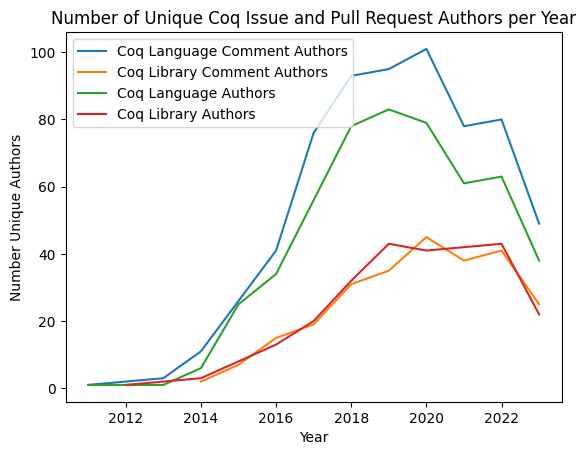

In [26]:
ispr_comments_lang.plot(kind='line', label='Coq Language Comment Authors')
ispr_comments_lib.plot(kind='line', label='Coq Library Comment Authors')
ispr_lang.plot(kind='line', label='Coq Language Authors')
ispr_lib.plot(kind='line', label='Coq Library Authors')
plt.xlabel('Year')
plt.ylabel('Number Unique Authors')
plt.title('Number of Unique Coq Issue and Pull Request Authors per Year')
plt.legend()
plt.show()

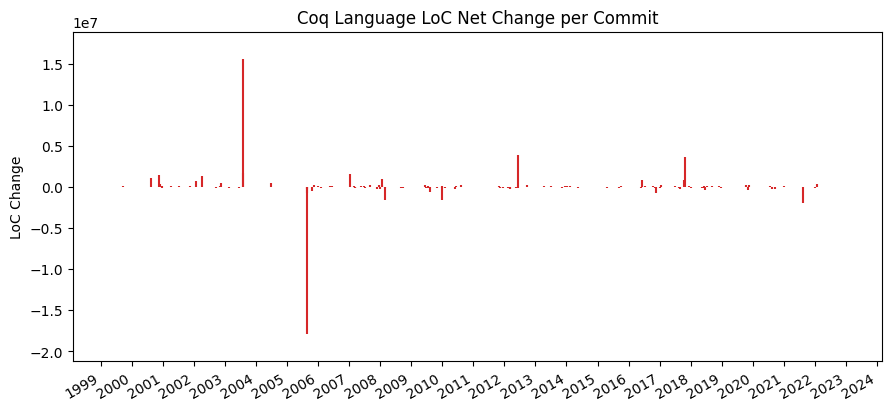

In [29]:
# Find the change in the total size of Coq and Coq Libraries

# Coq lang commits
with open('DataCollection/coq-commits/Coq_coq_coq_Commits.json') as f:
    lean_commits = json.load(f)
df = pd.DataFrame(lean_commits)
df['date'] = pd.to_datetime(df['date'], utc=True)
dates = []
nets = []
for idx, row in df.iterrows():
    net = 0
    diffs = row['diff']
    for diff in diffs:
        net += diff['additions']
        net -= diff['deletions']
    dates.append(row['date'])
    nets.append(net)

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(8.8, 4), layout="constrained")
ax.set(title="Coq Language LoC Net Change per Commit")

ax.vlines(dates, 0, nets, color="tab:red")


# format x-axis with 12-month intervals
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=12))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")
ax.set_ylabel('LoC Change')

ax.margins(y=0.1)
plt.show()

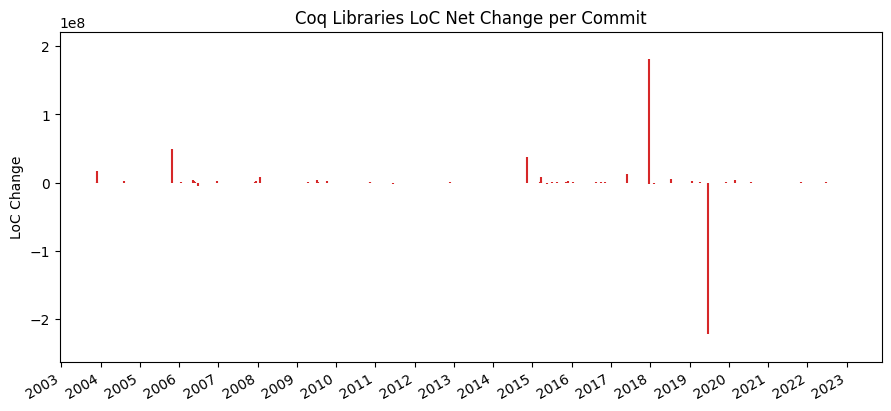

In [32]:
# Find the change in the total size of Coq and Coq Libraries

# Coq Libraries commits
data = []
for filename in os.listdir('DataCollection/coq-commits'):
    # Check if the file is a JSON file
    if filename.endswith(".json") and filename != 'Coq_coq_coq_Commits.json':
        filepath = os.path.join('DataCollection/coq-commits', filename)
        try:
            with open(filepath) as f:
                data.extend(json.load(f))
        except json.JSONDecodeError:
            pass
df = pd.DataFrame(data)
df['date'] = pd.to_datetime(df['date'], utc=True)
dates = []
nets = []
for idx, row in df.iterrows():
    net = 0
    diffs = row['diff']
    for diff in diffs:
        net += diff['additions']
        net -= diff['deletions']
    dates.append(row['date'])
    nets.append(net)

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(8.8, 4), layout="constrained")
ax.set(title="Coq Libraries LoC Net Change per Commit")

ax.vlines(dates, 0, nets, color="tab:red")


# format x-axis with 12-month intervals
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=12))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")
ax.set_ylabel('LoC Change')

ax.margins(y=0.1)
plt.show()